In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
salary_frame = pd.read_csv('Resources/salaries.csv')

In [8]:
salary_frame

salary_frame = salary_frame[['player_id', 'salary', 'season_end']]
salary_frame

,player_id,salary,season_end
0,abdelal01,395000,1991
1,abdelal01,494000,1992
2,abdelal01,500000,1993
3,abdelal01,805000,1994
4,abdelal01,650000,1995
...,...,...,...
14158,zipsepa01,750000,2017
14159,zipsepa01,1312611,2018
14160,zizican01,1645200,2018
14161,zubaciv01,1034956,2017


In [12]:
salary_frame['Year_Bins'] = pd.cut(x = salary_frame['season_end'],
                                    bins = [0, 1990, 2000, 2010, 2020],
                                    labels = ["1980s", "1990s", "2000s", "2010s"])

salary_frame


,player_id,salary,season_end,Year_Bins
0,abdelal01,395000,1991,1990s
1,abdelal01,494000,1992,1990s
2,abdelal01,500000,1993,1990s
3,abdelal01,805000,1994,1990s
4,abdelal01,650000,1995,1990s
...,...,...,...,...
14158,zipsepa01,750000,2017,2010s
14159,zipsepa01,1312611,2018,2010s
14160,zizican01,1645200,2018,2010s
14161,zubaciv01,1034956,2017,2010s


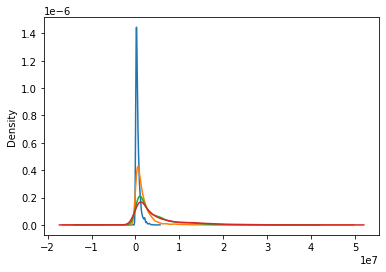

In [20]:
salary_1980 = salary_frame[salary_frame['Year_Bins'] == '1980s']
salary_1990 = salary_frame[salary_frame['Year_Bins'] == '1990s']
salary_2000 = salary_frame[salary_frame['Year_Bins'] == '2000s']
salary_2010 = salary_frame[salary_frame['Year_Bins'] == '2010s']


salary_1980['salary'].plot.density()
salary_1990['salary'].plot.density()
salary_2000['salary'].plot.density()
salary_2010['salary'].plot.density()



In [26]:
salary_80 = round(salary_1980['salary'].mean(), 2)


salary_90 = round(salary_1990['salary'].mean(), 2)


salary_00 = round(salary_2000['salary'].mean(), 2)


salary_10 = round(salary_2010['salary'].mean(), 2)



eras_salary = pd.DataFrame({'Eras': [1980, 1990, 2000,2010],
                                    'Average Salary': [salary_80, salary_90, salary_00, salary_10],
                                     })

eras_salary

,Eras,Average Salary
0,1980,511014.07
1,1990,1671198.85
2,2000,3859651.88
3,2010,4704301.40


<BarContainer object of 4 artists>

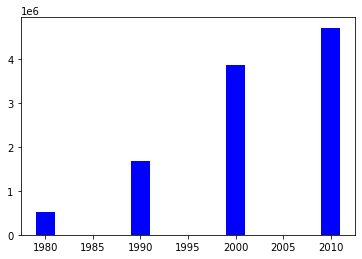

In [27]:
ax = plt.subplot(111)
w = 2
ax.bar(eras_salary['Eras'], eras_salary['Average Salary'], width=w, color='b', align='center')